In [1]:

from keras.models import Model
from keras.layers import Flatten,Dense
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plot
from glob import glob

2023-02-02 10:00:53.950426: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-02 10:00:54.147873: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-02 10:00:54.186410: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-02 10:00:54.186437: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:

IMAGESHAPE = [224, 224, 3] 
training_data = 'chest_xray/train'
testing_data = 'chest_xray/test'

In [3]:
vgg_model = VGG16(input_shape=IMAGESHAPE, weights='imagenet', include_top=False)


2023-02-02 10:03:27.793615: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-02 10:03:27.793633: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-02 10:03:27.793648: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nsl47): /proc/driver/nvidia/version does not exist
2023-02-02 10:03:27.794213: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


58889256/58889256 [==============================] - 10s 0us/step


In [4]:
for each_layer in vgg_model.layers:
    each_layer.trainable = False

In [5]:
classes = glob('chest_xray/train/*')

In [6]:
flatten_layer = Flatten()(vgg_model.output)
prediction = Dense(len(classes),activation='softmax')(flatten_layer)

In [7]:
final_model = Model(inputs= vgg_model.input, outputs = prediction)
final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
final_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator

trian_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range=0.2,
                                  horizontal_flip= True)
testing_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = trian_datagen.flow_from_directory('chest_xray/train',
                                                target_size = (224,224),
                                                batch_size= 4,
                                                class_mode= 'categorical')

Found 5216 images belonging to 2 classes.


In [11]:
test_set = testing_datagen.flow_from_directory('chest_xray/test',
                                              target_size=(224,224),
                                              batch_size=4,
                                              class_mode='categorical')

Found 624 images belonging to 2 classes.


In [13]:
fitted_model = final_model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs=5,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

Epoch 1/5


/tmp/ipykernel_97125/297610421.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fitted_model = final_model.fit_generator(


1304/1304 [==============================] - 533s 409ms/step - loss: 0.2746 - accuracy: 0.9293 - val_loss: 0.4543 - val_accuracy: 0.9183
Epoch 2/5
1304/1304 [==============================] - 534s 410ms/step - loss: 0.2380 - accuracy: 0.9461 - val_loss: 1.0232 - val_accuracy: 0.8750
Epoch 3/5
1304/1304 [==============================] - 533s 409ms/step - loss: 0.2591 - accuracy: 0.9496 - val_loss: 0.6122 - val_accuracy: 0.9167
Epoch 4/5
1304/1304 [==============================] - 535s 410ms/step - loss: 0.1951 - accuracy: 0.9592 - val_loss: 0.8237 - val_accuracy: 0.9119
Epoch 5/5
1304/1304 [==============================] - 550s 422ms/step - loss: 0.2023 - accuracy: 0.9620 - val_loss: 0.9697 - val_accuracy: 0.9087


In [14]:
final_model.save('pneumonia_model.h5')

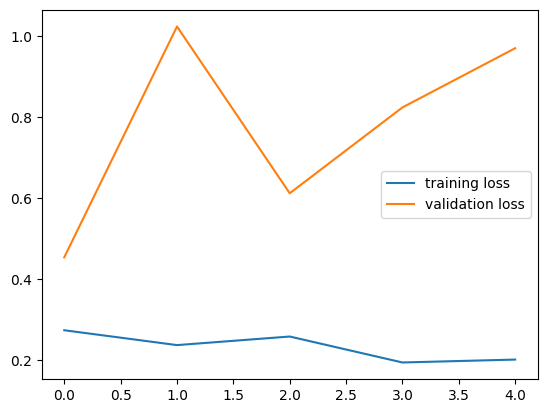

KeyError: 'acc'

<Figure size 640x480 with 0 Axes>

In [21]:
plot.plot(fitted_model.history['loss'], label='training loss') #Plotting the accuracies
plot.plot(fitted_model.history['val_loss'], label='validation loss')
plot.legend()
plot.show()
plot.savefig('LossVal_loss')
plot.plot(fitted_model.history['acc'], label='training accuracy')
plot.plot(fitted_model.history['val_acc'], label='validation accuracy')
plot.legend()
plot.show()
plot.savefig('AccVal_acc')

In [17]:
from keras_preprocessing import image
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
import numpy as np

model=load_model('pneumonia_model.h5') #Loading our model

# img=image.load_img('chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg',target_size=(224,224))
img=image.load_img('chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg',target_size=(224,224))

imagee=image.img_to_array(img) #Converting the X-Ray into pixels
imagee=np.expand_dims(imagee, axis=0)
img_data=preprocess_input(imagee)
prediction=model.predict(img_data)

if prediction[0][0]>prediction[0][1]:  #Printing the prediction of model.
    print('Person is safe.')
else:
    print('Person is affected with Pneumonia.')
print(f'Predictions: {prediction}')

1/1 [==============================] - 0s 155ms/step
Person is affected with Pneumonia.
Predictions: [[0. 1.]]


# More Explain 
https://www.geeksforgeeks.org/pneumonia-detection-using-deep-learning/